In [51]:
import flapjack
from flapjack import registry as reg
from flapjack import analysis as analysis
from flapjack import tables as tables
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import scipy
from scipy.optimize import curve_fit
%matplotlib inline

In [52]:
registry = reg.Registry(database_name='data', username='maca', password='macata125')

In [53]:
# First we make a query to the database by applying filters 
qall = registry.queryAll()
qplasmid = qall.filter(tables.plasmids.name=='pLux76:RFP/pLacI:YFP/std:CFP')
qaTc = qall.filter(tables.inducers.name=='aTc')

# Then get a pandas dataframe by running the query on the database
dfplasmid = psql.read_sql_query(qplasmid.selectable, registry.engine)
dfplasmid.head()

dfatc = psql.read_sql_query(qaTc.selectable, registry.engine)
dfatc.head()


,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,1.081468e-06,aTc,3,OD600:600,0.197,0.194444,99,99,2,1,3,M9,1,pTet:RFP/pLacI:YFP/std:CFP,Top10,2,atc-iptg rep 1 23-02-18 base de datos,Synergy HTX15070916
1,5.400734e-07,aTc,4,OD600:600,0.202,0.194444,100,100,2,1,4,M9,1,pTet:RFP/pLacI:YFP/std:CFP,Top10,2,atc-iptg rep 1 23-02-18 base de datos,Synergy HTX15070916
2,4.320587e-07,aTc,5,OD600:600,0.204,0.194444,101,101,2,1,5,M9,1,pTet:RFP/pLacI:YFP/std:CFP,Top10,2,atc-iptg rep 1 23-02-18 base de datos,Synergy HTX15070916
3,2.160293e-07,aTc,6,OD600:600,0.181,0.194444,102,102,2,1,6,M9,1,pTet:RFP/pLacI:YFP/std:CFP,Top10,2,atc-iptg rep 1 23-02-18 base de datos,Synergy HTX15070916
4,1.728235e-07,aTc,7,OD600:600,0.175,0.194444,103,103,2,1,7,M9,1,pTet:RFP/pLacI:YFP/std:CFP,Top10,2,atc-iptg rep 1 23-02-18 base de datos,Synergy HTX15070916


In [48]:

dfall = registry.get_all_measurements()
odmax = np.max(dfall[dfall.measurements_name=='OD600:600']['measurements_value'].values)
print odmax
yfpmax = np.max(dfall[dfall.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'].values)
print yfpmax
rfpmax = np.max(dfall[dfall.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'].values)
print rfpmax
cfpmax = np.max(dfall[dfall.measurements_name=='CFP:420/50,485/20']['measurements_value'].values)
print cfpmax

mnames = dfall['measurements_name'].unique()
measmax = {}
for m in mnames:
    measmax[m] = np.max(dfall[dfall.measurements_name==m]['measurements_value'].values)
    
print measmax

print measmax['OD600:600']

1.311
1137316.0
551860.0
147607.0
{u'OD600:600': 1.3109999999999999, u'RFP-YFP:585/10,620/15': 551860.0, u'CFP:420/50,485/20': 147607.0, u'RFP-YFP:500/27,540/25': 1137316.0}
1.311


[u'pTet:RFP/pLacI:YFP/std:CFP' u'pTet:RFP/J23107:YFP/std:CFP']
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']
Entropy of OD 4.69263
---
Entropy of OD600:600 4.69263
---
{u'OD600:600': -0.0, u'RFP-YFP:585/10,620/15': 5.443109, u'CFP:420/50,485/20': 4.0534415, u'RFP-YFP:500/27,540/25': 3.9347045}
---
3.59699


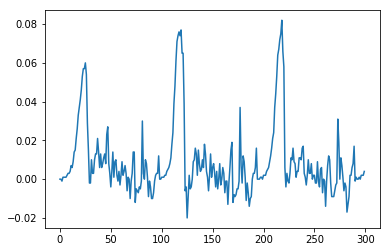

In [54]:
# Compute the diffs in our data frame, grouping by sample
diffs = analysis.compute_measurement_diff(dfplasmid, 'OD600:600')
plt.plot(diffs[0:300])

# Here are the unique measurement names in our dataframe
pnames = dfatc['plasmids_name'].unique()
mnames = dfatc['measurements_name'].unique()

print pnames
print mnames

# Compute the entropy of the different measurements
HY = analysis.channel_entropy(dfatc, 'OD600:600', 256, [0,0.1])
print 'Entropy of OD', HY
print '---'

# Or
H1 = analysis.channel_entropy(dfatc, mnames[0], 256, [0,0.1])
print 'Entropy of', mnames[0], H1
print '---'

# Entropy of all channels (same binning, not good)
# Gives a dictionary with pairs name:entropy
H = analysis.channel_entropies(dfatc, 256, [0,8000])
print H
print '---'

Hc=analysis.channel_conditional_entropy(dfatc, 'OD600:600', 'RFP-YFP:500/27,540/25',[256,256], [[0,0.1],[0,8000]])
print Hc